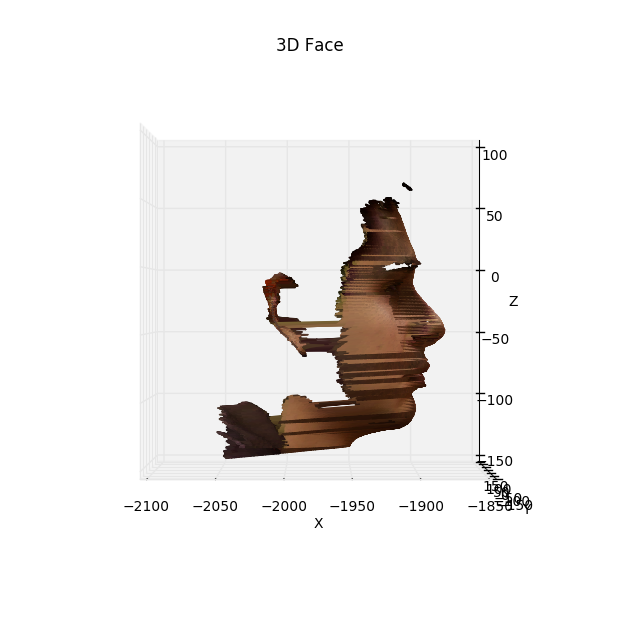

KeyboardInterrupt: 

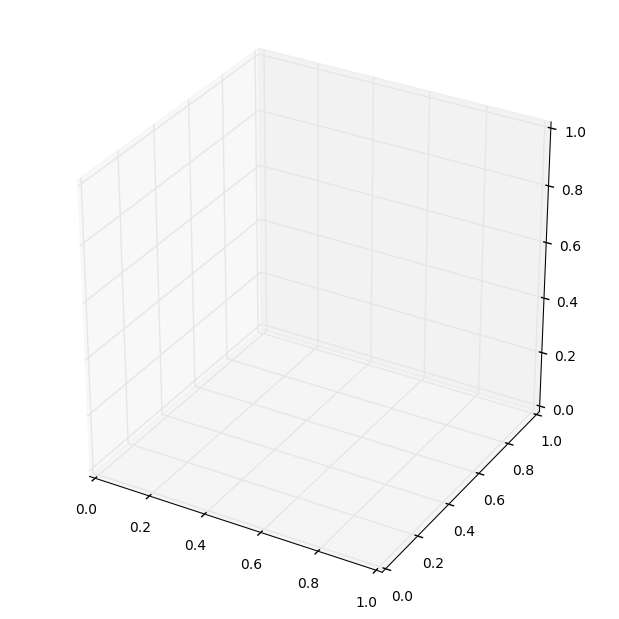

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import time
from IPython.display import display, clear_output
from mpl_toolkits.mplot3d import Axes3D
import scipy.misc as misc


# plot will show in notebook with %matplotlib inline  
%matplotlib inline                

def readABS(filename):
    '''This function take a abs file name, and read data from the file.
    get data flag, X, Y, Z and put each one data in two dimension array.
    return flag_2d_array (two dimension array of int), x_2d_array (two 
    dimension array of float), y_2d_array (two dimension array of float), 
    z_2d_array (two dimension array of float)'''
    
    invalid_value = -999999.0         # background of image
    
    fp = open(filename, 'r')

    line = fp.readline()              # read first line, each line is a string type
     
    first_list = line.split()         # split string to list 

    # get rows number, convert first_list[0] to integer
    rows_number = int(first_list[0])  

    line = fp.readline()              # read second line
 
    second_list = line.split()        # split string to list   

    # get column number, convert second_list[0] to integer
    columns_number = int(second_list[0]) 
     
    line = fp.readline()              # read third line
 
    line = fp.readline()              # read fouth line
 
    flag_str_list = line.split()          # split string to list   
    flag_int_list = [ int(i) for i in flag_str_list ]   # comprehension of list: convert string to int
    
    line = fp.readline()              # read fifth line
    
    x_str_list = line.split()         # split string to list  

    x_float_list = [ float(i) for i in x_str_list ]   # comprehension of list: convert string to float
   
    line = fp.readline()              # read sixth line
    
    y_str_list = line.split()         # split string to list  
    y_float_list = [ float(i) for i in y_str_list ]   # comprehension of list: convert string to float
 
    print(type(y_float_list[0]))
    line = fp.readline()              # read seventh line

    z_str_list = line.split()         # split string to list  
    z_float_list = [ float(i) for i in z_str_list ]   # comprehension of list: convert string to float

    
    # flag, X, Y, Z  From one dimension array to dimensional array
    
    flag_1d_array = np.array(flag_int_list)   # make one dimension array from flag_list

    # make two dimension array from one dimension array (reshape)
    flag_2d_array = np.reshape(flag_1d_array, (rows_number, columns_number) ) 
 
    x_1d_array = np.array(x_float_list)   # make one dimension array from x_float_list
    
    x_1d_array[x_1d_array == invalid_value] = np.nan    # change -999999 to nan
    
    # make two dimension array from one dimension array (reshape)
    x_2d_array = np.reshape(x_1d_array, (rows_number, columns_number))
    
    y_1d_array = np.array(y_float_list)   # make one dimension array from y_float_list

    y_1d_array[y_1d_array == invalid_value] = np.nan    # change -999999 to nan
    
    # make two dimension array from one dimension array (reshape)
    y_2d_array = np.reshape(y_1d_array, (rows_number, columns_number))
   
    z_1d_array = np.array(z_float_list)   # make one dimension array from z_float_list

    z_1d_array[z_1d_array == invalid_value] = np.nan    # change -999999 to nan
    
    # make two dimension array from one dimension array (reshape)
    z_2d_array = np.reshape(z_1d_array, (rows_number, columns_number))
        
    return flag_2d_array, x_2d_array, y_2d_array, z_2d_array


def showFace(face, im):
    '''this function take face as input and display the face'''

    flag = face[0]
    X = face[1]
    Y = face[2]  
    Z = face[3]  
  
    fig = plt.figure(figsize = (6, 6))  # set fig size

    # for loop get rotate angle (from -90 to 90, inceasing 10 each time)
    for angle in range(-90, 90, 45):             
     
        # Draw surface
        axis = Axes3D(fig)
        surf = axis.plot_surface(Z, X, Y, rstride=2,cstride=2,facecolors=im)
    
        axis.view_init(0, angle)            # rotate fig.

        axis.set_xlabel('X')
        axis.set_ylabel('Y')
        axis.set_zlabel('Z')
        axis.set_title('3D Face')

        time.sleep(0.01)               # set up the waiting time
        clear_output(wait = True) 
        display(fig)   
        fig.clear()

    
# following is main program

face = readABS('04854d56.abs')
im = misc.imresize(img.imread('04854d57.ppm'),200)/256
showFace(face, im)
